In [1]:
# imports bib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

In [2]:
# récupération des données form de  csv du fichier 
df = pd.read_csv("tic-tac-toe.csv")
df.head(20)

,1,2,3,4,5,6,7,8,9,MOVE
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,-1,3
2,1,0,1,0,0,-1,0,0,-1,2
3,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,-1,0,0,2
5,1,1,0,0,0,0,-1,-1,0,3
6,0,0,-1,0,0,0,0,0,0,5
7,0,-1,-1,0,1,0,0,0,0,1
8,1,-1,-1,0,1,0,0,0,-1,6
9,1,-1,-1,0,1,1,-1,0,-1,4


In [3]:
# afficher un résumé de la dataframe de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       5000 non-null   int64
 1   2       5000 non-null   int64
 2   3       5000 non-null   int64
 3   4       5000 non-null   int64
 4   5       5000 non-null   int64
 5   6       5000 non-null   int64
 6   7       5000 non-null   int64
 7   8       5000 non-null   int64
 8   9       5000 non-null   int64
 9   MOVE    5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB


In [4]:
# obtenir un résumé statistique des données du DataFrame
stats = df.describe()
stats

,1,2,3,4,5,6,7,8,9,MOVE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.401800,-0.051000,-0.054800,-0.141000,0.050000,-0.18720,-0.156000,-0.180200,-0.205000,3.625800
std,0.656691,0.582466,0.581261,0.505144,0.611862,0.45409,0.477608,0.442003,0.434296,2.406685
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,9.000000


In [5]:
# séparer les données d'entrée (data) et de sortie (target) pour le  modèle de prédiction.
data= df.drop('MOVE', axis = 1)
target=df['MOVE'].values

In [6]:
# 85% données d'entrainement, 15% données de test
train_X, test_X, train_Y, test_Y = train_test_split(data, target, test_size=0.15, random_state=0)

In [7]:
from sklearn.neural_network import MLPClassifier
# MLP: création + entrainement
mlp = MLPClassifier(hidden_layer_sizes=(30, 20), random_state=1, max_iter=600)

In [8]:
# entraîner le modèle de réseau de neurones à perceptron multi-couches (MLP) avec des données d'entraînement ettiquete.
mlp.fit(train_X.values, train_Y)

MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=600, random_state=1)

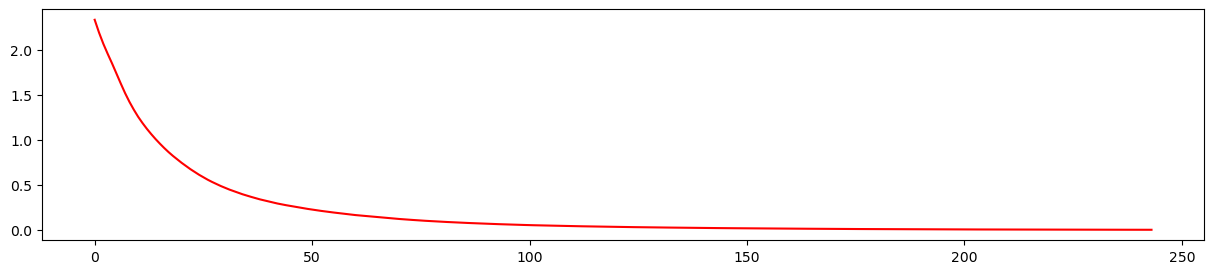

In [9]:
# Erreur au cours des itérations
plt.figure(figsize=(15,3))
plt.plot(mlp.loss_curve_, c='red')
plt.show()

In [10]:
# Calculer les sorties du réseaux en utilisant les données test
test_ypred = mlp.predict(test_X.values)

In [11]:
print(test_ypred)

[2 7 1 3 3 1 1 1 1 2 7 8 5 8 8 7 2 9 5 1 2 1 7 4 1 5 3 1 1 1 3 4 1 7 3 2 1
 3 3 1 5 2 2 7 5 4 7 1 5 1 1 5 5 7 3 7 4 1 2 2 3 1 2 2 3 3 1 3 1 2 5 1 7 2
 3 4 1 1 3 2 5 2 2 5 3 9 5 2 4 3 1 9 3 2 5 5 4 5 3 1 4 7 2 3 1 1 3 3 9 1 2
 9 5 2 3 1 1 7 1 7 7 2 3 9 1 1 2 3 7 5 1 1 9 1 1 1 1 2 9 7 6 1 2 5 5 3 8 4
 1 2 3 7 4 2 2 6 1 2 1 5 3 5 2 5 5 2 1 8 5 3 9 3 3 1 2 5 7 3 7 3 5 4 3 8 3
 3 7 1 1 7 3 4 7 2 4 8 1 1 2 1 3 3 7 3 1 1 1 5 7 1 1 3 2 5 5 1 2 3 2 1 6 1
 2 1 5 1 8 1 9 5 8 1 6 7 7 1 3 5 2 8 1 1 7 9 2 8 2 1 3 1 5 3 8 3 3 5 4 3 7
 2 7 5 1 2 6 7 2 1 1 5 3 2 1 2 3 8 2 3 3 5 1 9 1 4 7 7 5 3 3 1 3 1 1 3 1 1
 2 3 5 2 3 1 2 3 3 1 4 5 6 5 7 5 5 3 2 3 6 1 3 4 3 5 3 7 3 1 3 1 5 1 1 2 2
 4 5 4 5 2 3 2 1 3 1 8 1 5 6 3 1 2 1 1 2 3 6 3 7 3 1 1 6 5 4 2 3 3 3 2 4 5
 1 7 2 2 1 1 3 1 2 8 2 3 2 1 1 8 7 1 2 5 2 3 3 4 5 9 3 2 7 3 5 4 1 6 5 4 9
 3 3 1 1 2 5 1 1 7 1 2 2 3 2 2 4 2 1 7 1 5 7 1 4 5 3 2 4 1 7 1 3 2 3 6 1 5
 9 3 5 2 4 1 3 3 9 2 6 2 1 4 6 2 4 5 1 3 3 7 3 6 2 4 7 4 5 1 8 8 1 4 3 3 3
 3 1 7 2 3 3 7 2 3 1 2 1 

In [12]:
# Comparaison : sorties réelles - sorties désirées
np.concatenate((test_Y.reshape(test_Y.shape[0],1),test_ypred.reshape(test_ypred.shape[0],1)),axis=1)

array([[2, 2],
       [7, 7],
       [1, 1],
       ...,
       [6, 6],
       [1, 1],
       [5, 5]], dtype=int64)

In [13]:
#Taux de classification correcte
mlp.score(test_X.values, test_Y)

0.9946666666666667

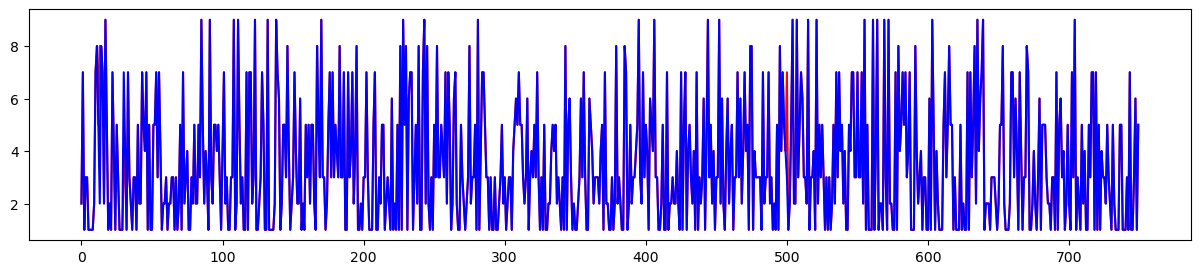

In [14]:
# afficher graphiquement les résultats de prédiction (test_ypred) et les valeurs réelles (test_Y) pour les données de test.
plt.figure(figsize=(15,3))
plt.plot(test_ypred,'-r',test_Y,'-b')
plt.show()

In [17]:
# Verifier si on a arrive au cas d'un gangnat ou bien match null 
def CheckWinner(board):
    # transform un vecteur b de taille 9 a une matrice board pour facilite le traitement 
    tmp = np.array(board)
    bo = tmp.reshape(3,3)
    for i in range(3):
        # est ce qu'il ya une ligne de meme valeur 
        if bo[i][0] == bo[i][1] == bo[i][2] and bo[i][0] != ' ':
            return 1 if bo[i][0] == 'X' else 2
        #  est ce qu'il ya un colonne de meme valeur 
        if bo[0][i] == bo[1][i] == bo[2][i] and bo[0][i] != ' ':
            return 1 if bo[0][i] == 'X' else 2
    # est ce qu'il ya un diagonal de meme valeur 
    if bo[0][0] == bo[1][1] == bo[2][2] and bo[0][0] != ' ':
        return 1 if bo[0][0] == 'X' else 2
    if bo[0][2] == bo[1][1] == bo[2][0] and bo[0][2] != ' ':
        return 1 if bo[0][2] == 'X' else 2
    # verifier si on a une draw
    if ' ' not in [items for sublist in bo for items in sublist]:
        return -1
    # le jeux n'est pas encore fini 
    return 

In [18]:
# afficher le bord apres chaque coup 
def display_board(board):
    print(" {} | {} | {} ".format(board[0], board[1], board[2]))
    print("---+---+---")
    print(" {} | {} | {} ".format(board[3], board[4], board[5]))
    print("---+---+---")
    print(" {} | {} | {} ".format(board[6], board[7], board[8]))

In [19]:
# prédire le prochain coup , en utilisant le reseau MLP [mlp.predict]
def predict_next_move(board) :
    X_test = board
#     remplacer 'x':1 , 'O': -1 , '':0
    for i in range(len(X_test)):
        if X_test[i] == 'X':
            X_test[i] = 1
        elif X_test[i] == 'O':
            X_test[i] = -1
        else:
            X_test[i] = 0
            
#   predire la valeur 
    X_test = [X_test]
    Y_test = mlp.predict(X_test)
    move = Y_test[0]
    return move

In [20]:
# definir la fonction qui permet jouer 
def play_game():
    # initialiser le board 
    board = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    i=0
    # donner la possibilité de jouer machine-home ou home-machine 
    while True:
        computerPlaysFirst = input("Computer plays first(y/n):")
        if computerPlaysFirst.upper() == "Y":
            player = 'X'
            break
        elif computerPlaysFirst.upper() == "N":
            player = 'O'
            break
        else:
            i += 1
            if i>=3:
                return
            
    j=0
    while True:
        if player == 'X' :
            # pridire next move utilisant reseau de neurons
            move = predict_next_move(board)-1
            print("Computer {} move: ".format(player) + str(move))
            
            # remplacer 1: 'X' . -1: 'O' , 0 : ' '
            for i in range(len(board)):
                if board[i] == 1:
                    board[i] = 'X'
                elif board[i] == -1:
                    board[i] = 'O'
                else:
                    board[i] = ' '
        else:
            move = int(input("Player {}: Enter your move (0-8):".format(player)))
        
        # mise a jour de board avec 'X' ou 'O'
        if board[move] == ' ':
            board[move] = player
            display_board(board)
            if CheckWinner(board) == 1 :
                print("Computer {} wins!".format(player))
                break
            elif CheckWinner(board) == 2 :
                print("Player {} wins!".format(player))
                break
            elif CheckWinner(board) == -1 :
                print("Draw")
                break
            else:
                 player = 'O' if player == 'X' else 'X'
        else:
            print("Invalid move. Please try again.")
            j += 1
            if j>=6:
                return

In [21]:
play_game()

Computer plays first(y/n):y
Computer X move: 0
 X |   |   
---+---+---
   |   |   
---+---+---
   |   |   
Player O: Enter your move (0-8):3
 X |   |   
---+---+---
 O |   |   
---+---+---
   |   |   
Computer X move: 1
 X | X |   
---+---+---
 O |   |   
---+---+---
   |   |   
Player O: Enter your move (0-8):5
 X | X |   
---+---+---
 O |   | O 
---+---+---
   |   |   
Computer X move: 2
 X | X | X 
---+---+---
 O |   | O 
---+---+---
   |   |   
Computer X wins!
